# 5. Plotting with seaborn

**seaborn** is one of the most important, if not the most important, data visualization tool in the Python data viz ecosystem. In this notebook will look at what features and capacities seaborn brings to the table. 

There's plenty more that you can do with the library that we won't cover here or elsewhere in the tutorial. I highly recommend browsing the terrific seaborn Gallery page (https://seaborn.pydata.org/examples/index.html) to see more beautiful examples of the library in action.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
root_path="https://minio.lab.sspcloud.fr/pengfei/diffusion/data_viz"

input_file=f'{root_path}/winemag-data_first150k.csv'
df=pd.read_csv(input_file,index_col=0)
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


## 5.1 Compare the bar chart of pandas with the countplot of seaborn

Comparing below chart with the bar chart from Lesson1, we find that, unlike pandas,
seaborn doesn't require us to shape the data for it via value_counts; the countplot (true to its name) aggregates the data for us!

In [3]:
print(df['points'])

0         96
1         96
2         96
3         96
4         95
          ..
150925    91
150926    91
150927    91
150928    90
150929    90
Name: points, Length: 150930, dtype: int64


<AxesSubplot:xlabel='points', ylabel='count'>

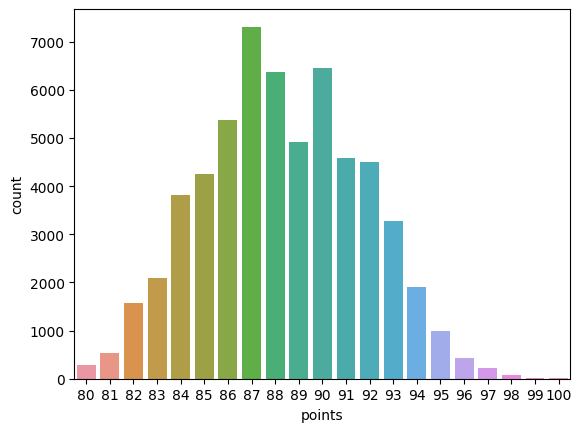

In [26]:
# countplot take column points as argument

sns.countplot(x='points',data=df)

## 5.2 KDE plot

seaborn doesn't have a direct analogue to the line or area chart. Instead, the package provides a kdeplot.

KDE, short for "kernel density estimate", is a statistical technique for smoothing out data noise.
It addresses an important fundamental weakness of a line chart: it will buff out outlier or "in-betweener"
values which would cause a line chart to suddenly dip.

For example, suppose that there was just one wine priced 19.93$, but several hundred prices 20.00$.
If we were to plot the value counts in a line chart, our line would dip very suddenly down to 1 and
then back up to around 1000 again, creating a strangely "jagged" line. The line chart with the same data,
shown below for the purposes of comparison, has exactly this problem!


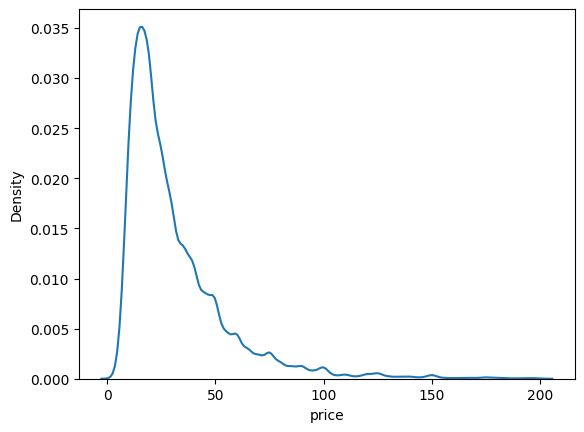

In [6]:
sns.kdeplot(df.query('price < 200').price)
plt.show()

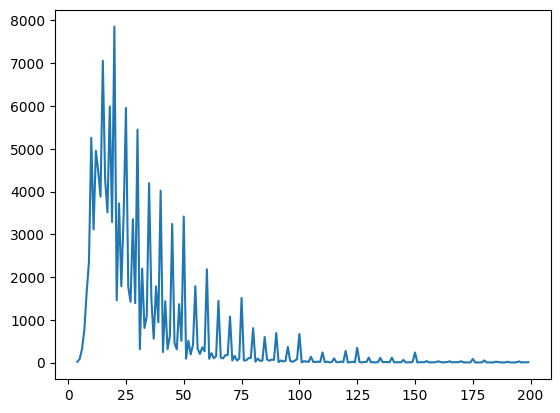

In [7]:
df.query('price < 200').price.value_counts().sort_index().plot.line()
plt.show()

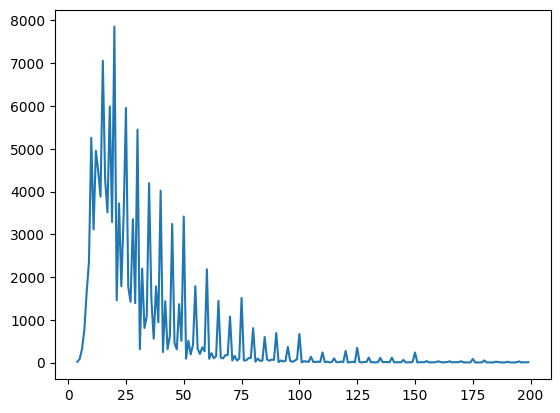

In [8]:
df[df['price']<200]['price'].value_counts().sort_index().plot.line()
plt.show()

A KDE plot is better than a line chart for getting the "true shape" of interval data. In fact,
I recommend always using it instead of a line chart for such data.

However, it's a worse choice for ordinal categorical data. A KDE plot expects that if there are 200 wine rated 85
and 400 rated 86, then the values in between, like 85.5, should smooth out to somewhere in between (say, 300).
However, if the value in between can't occur (wine ratings of 85.5 are not allowed), then the KDE plot is fitting to
something that doesn't exist. In these cases, use a line chart instead.

## 5.3 Bivariate KDE plots

KDE plots can also be used in two dimensions.
 **:** is assumed to represent all columns

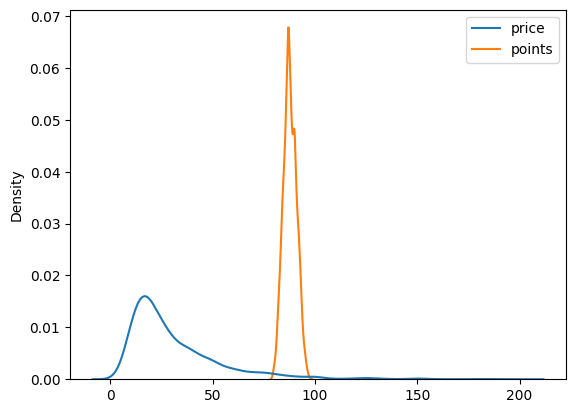

In [9]:
sns.kdeplot(df[df['price']<200].loc[:,['price','points']].dropna().sample(5000))
plt.show()

Bivariate KDE plots like the above one are a great alternative to scatter plots and hex plots.
They solve the same data overplotting issue that scatter plots suffer from and hex plots address,
in a different but similarly visually appealing. However, note that bivariate KDE plots are very
computationally intensive. We took a sample of 5000 points in this example to keep compute time reasonable.


## 5.4 Histogram of pandas vs Distplot of seaborn

The distplot is a composite plot type. In the example above we've turned off the kde that's included by default, and manually set the number of bins to 10 (two possible ratings per bin), to get a clearer picture.

/tmp/ipykernel_3628/816767714.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['points'],bins=10,kde=False)


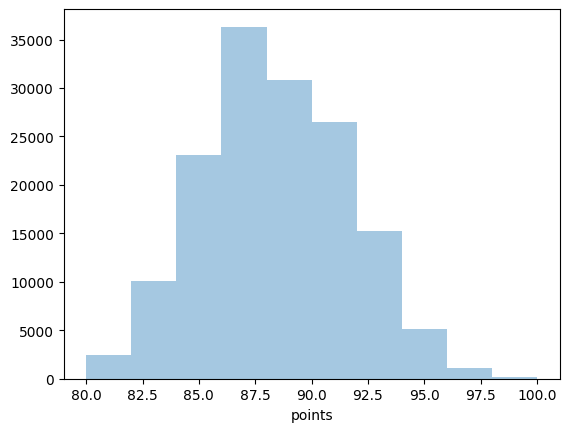

In [10]:
# bins become bigger , the bar size become smaller
sns.distplot(df['points'],bins=10,kde=False)
plt.show()

Notice that this plot comes with some bells and whistles: a correlation coefficient is provided, along with histograms on the sides. These kinds of composite plots are a recurring theme in seaborn. Other than that, the jointplot is just like the pandas scatter plot.

As in pandas, we can use a hex plot (by simply passing kind='hex') to deal with overplotting:

## 5.5 Scatterplot/hexplot of pandas vs jointplot of seaborn

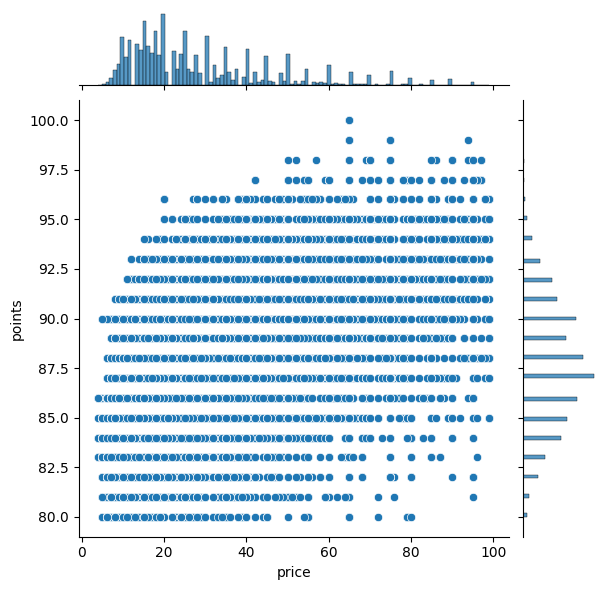

In [11]:
sns.jointplot(x='price',y='points',data=df[df['price']<100])
plt.show()

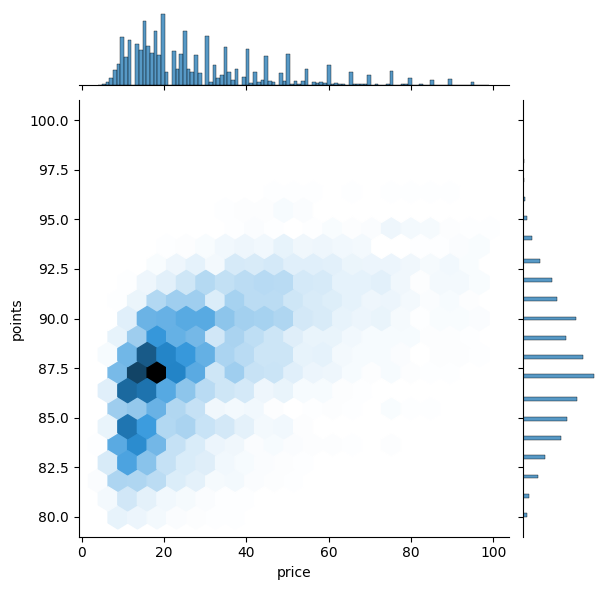

In [12]:
sns.jointplot(x='price',y='points',data=df[df['price']<100],kind='hex',gridsize=20)
plt.show()

## 5.6 Boxplot and violin plot of seaborn

Seaborn provides a boxplot function. It creates a statistically useful plot that looks like this

In [13]:
# get the top 5 five vin variety in vin number counts
chosen_variety_list=df.variety.value_counts().head(5).index
print(chosen_variety_list)

# filter the data set with the top 5 vin variety
vin_variety_df=df[df.variety.isin(chosen_variety_list)]

Index(['Chardonnay', 'Pinot Noir', 'Cabernet Sauvignon', 'Red Blend',
       'Bordeaux-style Red Blend'],
      dtype='object')


In [14]:
# get the stats of Bordeaux
bordeaux=vin_variety_df[vin_variety_df['variety']=="Bordeaux-style Red Blend"].points
print(bordeaux.describe())

count    7347.000000
mean       89.466857
std         3.295970
min        80.000000
25%        87.000000
50%        90.000000
75%        92.000000
max        99.000000
Name: points, dtype: float64


In [15]:
# get the stats of Red Blend
red_blend=vin_variety_df[vin_variety_df['variety']=="Red Blend"]

# get the stats of Red Blend where its score is greater than 97
red_blend_with_best_score=red_blend[red_blend['points'] > 97.00]

In [16]:
print(red_blend.points.describe())
print(red_blend_with_best_score.points.describe())

count    10062.000000
mean        88.063606
std          3.122539
min         80.000000
25%         86.000000
50%         88.000000
75%         90.000000
max        100.000000
Name: points, dtype: float64
count     13.000000
mean      98.692308
std        0.751068
min       98.000000
25%       98.000000
50%       99.000000
75%       99.000000
max      100.000000
Name: points, dtype: float64


/tmp/ipykernel_3628/1651345766.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  vin_variety_df.groupby(['variety']).max()[['points']].plot.line(figsize=(12, 6))


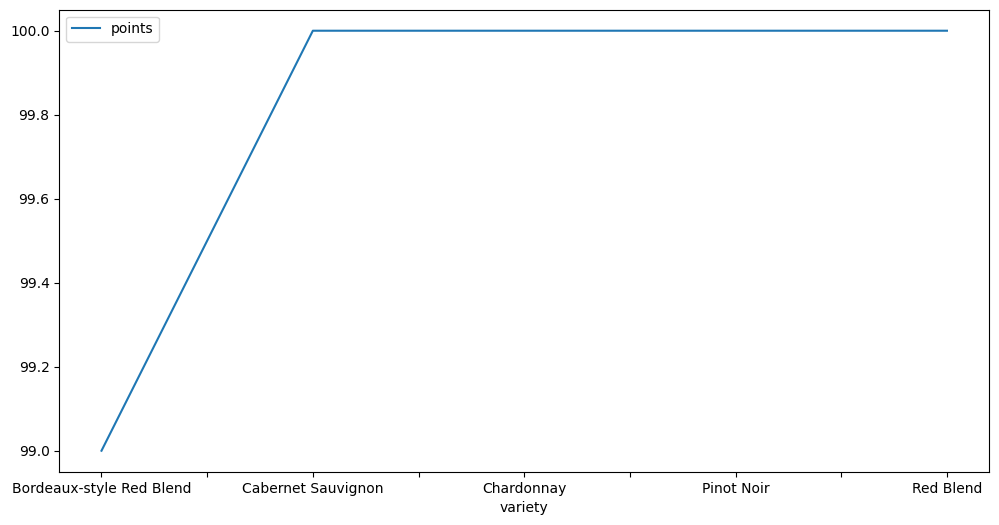

In [17]:
# We could notice that, the total num in Red blend is 10062, but total num in Red blend where it's score >97 is only 13
# in the box plot, when the num is so little it will not use the "whisker" (line), it will use "outliers" (circles) to
# represent these data.
vin_variety_df.groupby(['variety']).max()[['points']].plot.line(figsize=(12, 6))
plt.show()

### Box plot for vin variety and points

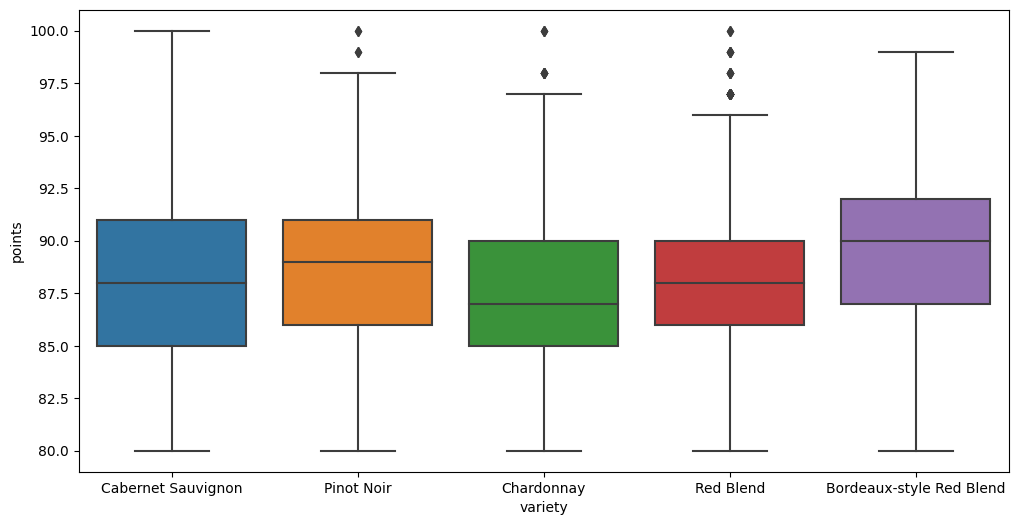

In [18]:

df = df[df.variety.isin(df.variety.value_counts().head(5).index)]
fig, ax=plt.subplots(figsize=(12, 6))
my_boxplot=sns.boxplot(x='variety', y='points', data=df,ax=ax)

plt.show()

The center of the distributions shown above is the "box" in boxplot. The top of the box is the 75th percentile,
while the bottom is the 25th percentile. In other words, half of the data is distributed within the box! The green line
in the middle is the median.

The other part of the plot, the "whiskers", shows the extent of the points beyond the center of the distribution.
Individual circles beyond that are outliers.

This boxplot shows us that although all five wines recieve broadly similar ratings, Bordeaux-style wines tend to be
rated a little higher than a Chardonnay.

Boxplots are great for summarizing the shape of many datasets. They also don't have a limit in terms of numeracy: you
can place as many boxes in the plot as you feel comfortable squeezing onto the page.

However, they only work for interval variables and nominal variables with a large number of possible values;
they assume your data is roughly normally distributed (otherwise their design doesn't make much sense); and they don't
carry any information about individual values, only treating the distribution as a whole.

I find the slightly more advanced violinplot to be more visually enticing, in most cases:

### Violinplot

A violinplot cleverly replaces the box in the boxplot with a kernel density estimate for the data.
It shows basically the same data, but is harder to misinterpret and much prettier than the utilitarian boxplot.

In [19]:
sns.violinplot(x='variety', y='points', data=df, ax=ax)
plt.show()


## 5.7 Exercise

In [20]:
pokemon_input_file=f'{root_path}/Pokemon.csv'
pokemon=pd.read_csv(pokemon_input_file,index_col=0)

In [21]:
print(pokemon.shape)
print(pokemon.dtypes)

(800, 12)
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


In [22]:
pokemon.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## 5.7.1. count plot on pokemon num count group by generation


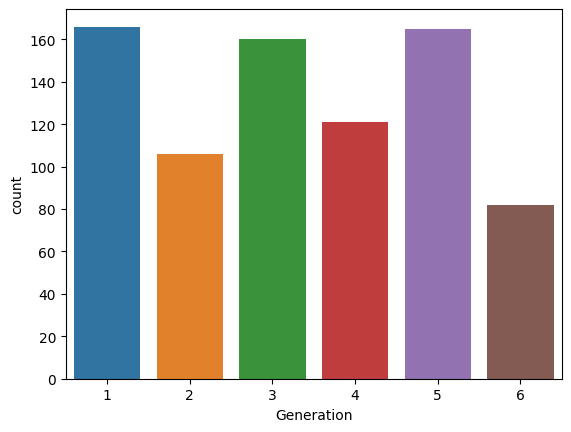

In [25]:
sns.countplot(x='Generation',data=pokemon)
plt.show()

## 5.7.2 kde plot on pokemon num group by HP
A  dist plot includes the kde (why)

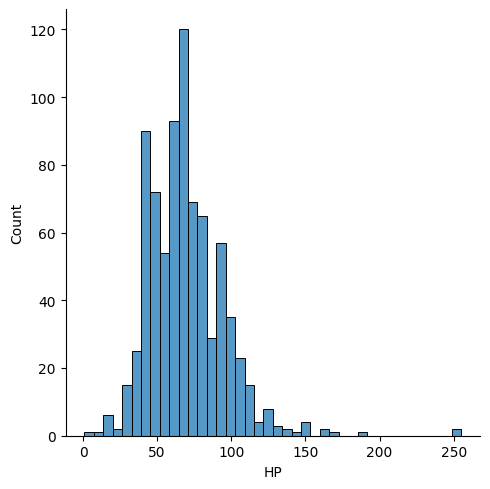

In [28]:
sns.displot(pokemon['HP'])
plt.show()

### 5.7.3 jointplot on defence and attack

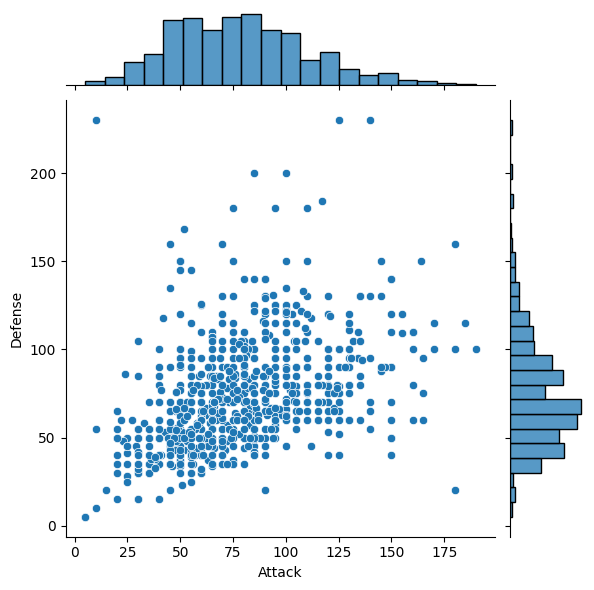

In [29]:
sns.jointplot(x='Attack', y='Defense', data=pokemon)
plt.show()

###  5.7.4. hexplot on defence and attack


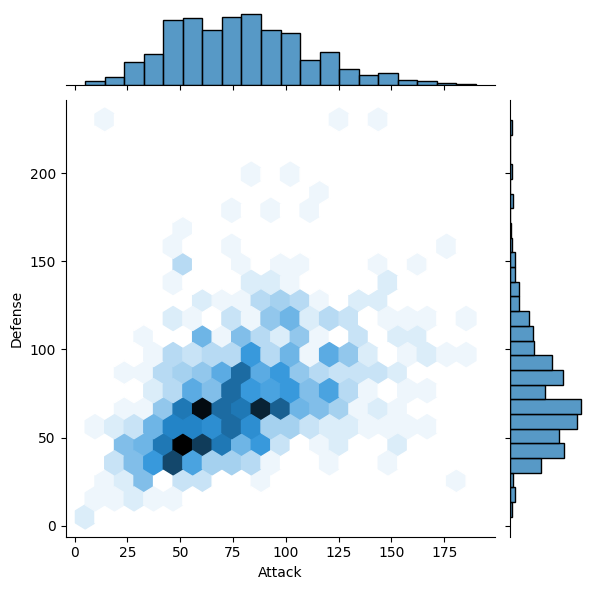

In [30]:
sns.jointplot(x='Attack', y='Defense', data=pokemon, kind='hex',gridsize=20)
plt.show()

### 5.7.5 kde plot on HP and attack


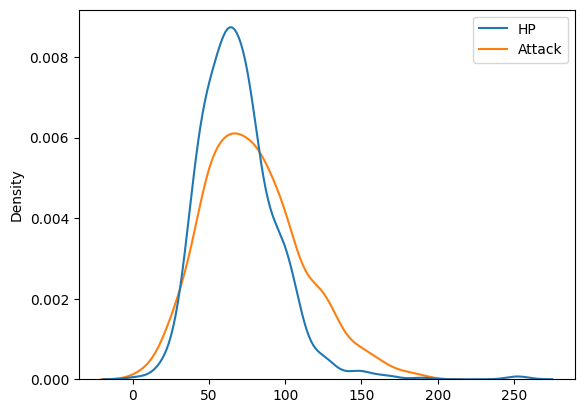

In [31]:
sns.kdeplot(pokemon.loc[:,['HP','Attack']])
plt.show()

### 5.7.6 box plot on attack group by legendary


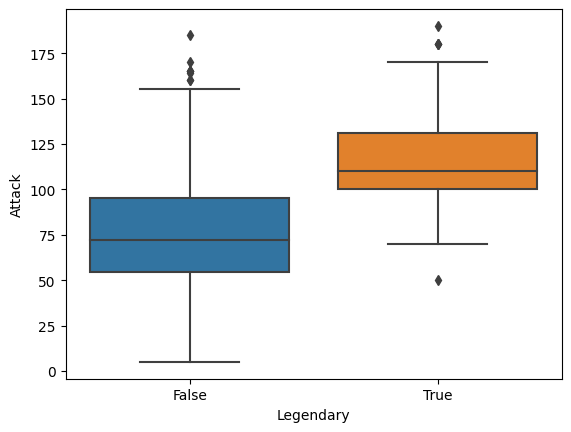

In [34]:
sns.boxplot(x='Legendary',y='Attack',data=pokemon)
plt.show()

### 5.7.7 violinplot on attack group by legendary

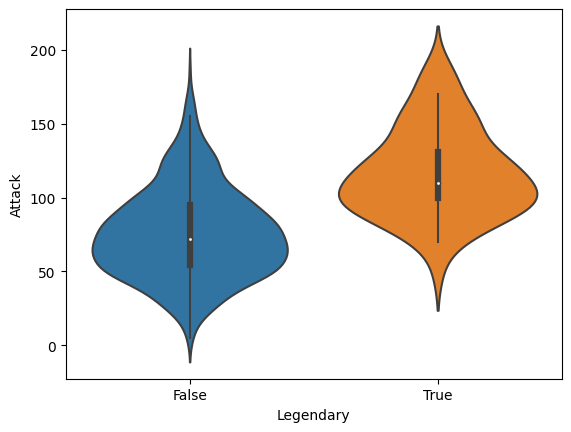

In [36]:
sns.violinplot(x='Legendary',y='Attack',data=pokemon)
plt.show()